In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df_signals_2016 = pd.read_csv("wind-farm-signals-2016.csv", sep=";")
df_signals_2017 = pd.read_csv("wind-farm-signals-2017.csv", sep=";")

In [3]:
# Merge dataframes
frames = [df_signals_2016, df_signals_2017]
df = pd.concat(frames, ignore_index=True)

In [4]:
# Extract selected columns
df = df[['Turbine_ID', 
        'Timestamp',
        'Gen_RPM_Avg', 
        'Gen_Bear_Temp_Avg',
        'Gen_Bear2_Temp_Avg',
        'Grd_Prod_Pwr_Avg', 
        'Grd_Prod_PsblePwr_Avg',]]

In [5]:
# Add new column with values showing difference in possible production and actual production
df['Grd_Prod_Psble_vs_Act'] = df['Grd_Prod_PsblePwr_Avg'] - df['Grd_Prod_Pwr_Avg']

In [6]:
# Convert to datetime and remove time zone
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize(None)

In [7]:
# Set datetime as index
df = df.set_index('Timestamp')

In [8]:
# Sort table by date and time
df = df.sort_values(by='Timestamp')

In [9]:
# Create new table containing only T07
df_07 = df.loc[df['Turbine_ID'] == 'T07']

In [10]:
df_07.head(3)

,Turbine_ID,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Bear2_Temp_Avg,Grd_Prod_Pwr_Avg,Grd_Prod_PsblePwr_Avg,Grd_Prod_Psble_vs_Act
Timestamp,,,,,,,
2016-01-01 00:00:00,T07,1254.9,41.0,39,112.7,113.3,0.6
2016-01-01 00:10:00,T07,1251.9,42.0,39,95.5,95.8,0.3
2016-01-01 00:20:00,T07,1251.1,42.0,39,103.6,103.3,-0.3


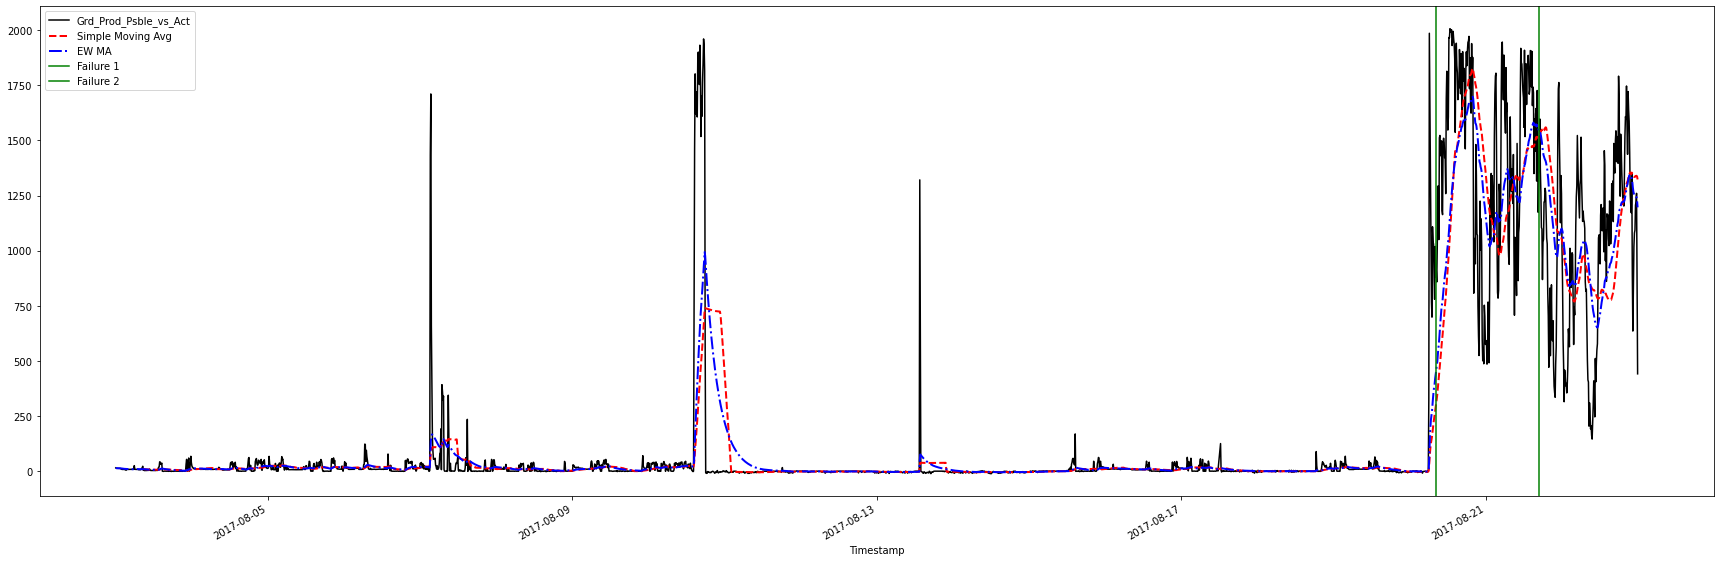

In [120]:
# Select time interval to plot
df_07_Psble_vs_Act = df_07['Grd_Prod_Psble_vs_Act']['2017-08-03':'2017-08-22']

# Insert timestamp of failure registered
time_of_failure = ['2017-08-20 08:10:00', '2017-08-21 16:50:00']

# Create moving average
ma = df_07_Psble_vs_Act.rolling(50).mean()

# Create exponentially weighted moving average
ewma = df_07_Psble_vs_Act.ewm(span=50).mean()

# Define size of plot and styles etc.
plt.figure(figsize=(30, 10))
df_07_Psble_vs_Act.plot(style="k-", label="Grd_Prod_Psble_vs_Act")
ma.plot(style="r--", label="Simple Moving Avg", linewidth=2.0)
ewma.plot(style="b-.", label="EW MA", linewidth=2.0)

# Create vertical lines at times of failure
n = 1
for failure in time_of_failure:
    plt.axvline(x=failure, color='g', label='Failure ' + str(n))
    n += 1

plt.legend()
plt.show()

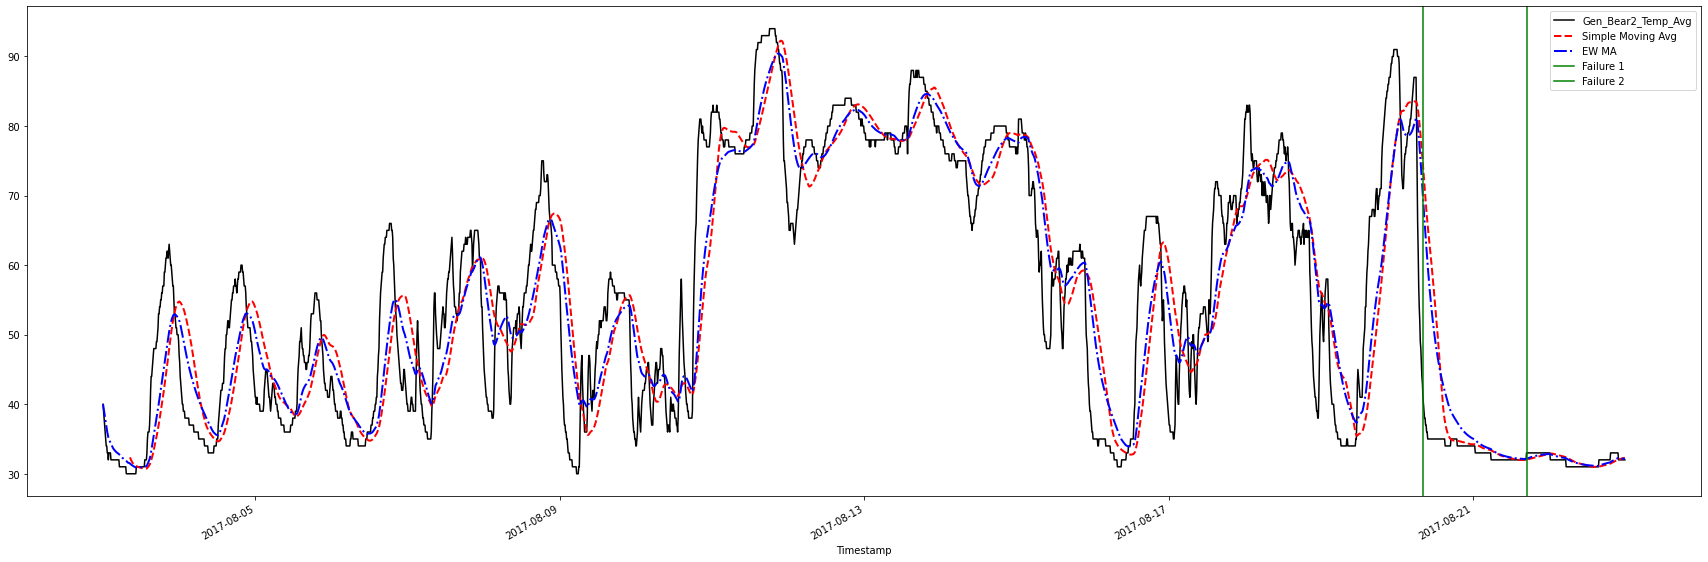

In [121]:
# Select time interval to plot
df_07_bear2 = df_07['Gen_Bear2_Temp_Avg']['2017-08-03':'2017-08-22']

# Insert timestamp of failure registered
time_of_failure = ['2017-08-20 08:10:00', '2017-08-21 16:50:00']

# Create moving average
ma = df_07_bear2.rolling(50).mean()

# Create exponentially weighted moving average
ewma = df_07_bear2.ewm(span=50).mean()

# Define size of plot and styles etc.
plt.figure(figsize=(30, 10))
df_07_bear2.plot(style="k-", label="Gen_Bear2_Temp_Avg")
ma.plot(style="r--", label="Simple Moving Avg", linewidth=2.0)
ewma.plot(style="b-.", label="EW MA", linewidth=2.0)

# Create vertical lines at times of failure
n = 1
for failure in time_of_failure:
    plt.axvline(x=failure, color='g', label='Failure ' + str(n))
    n += 1

plt.legend()
plt.show()

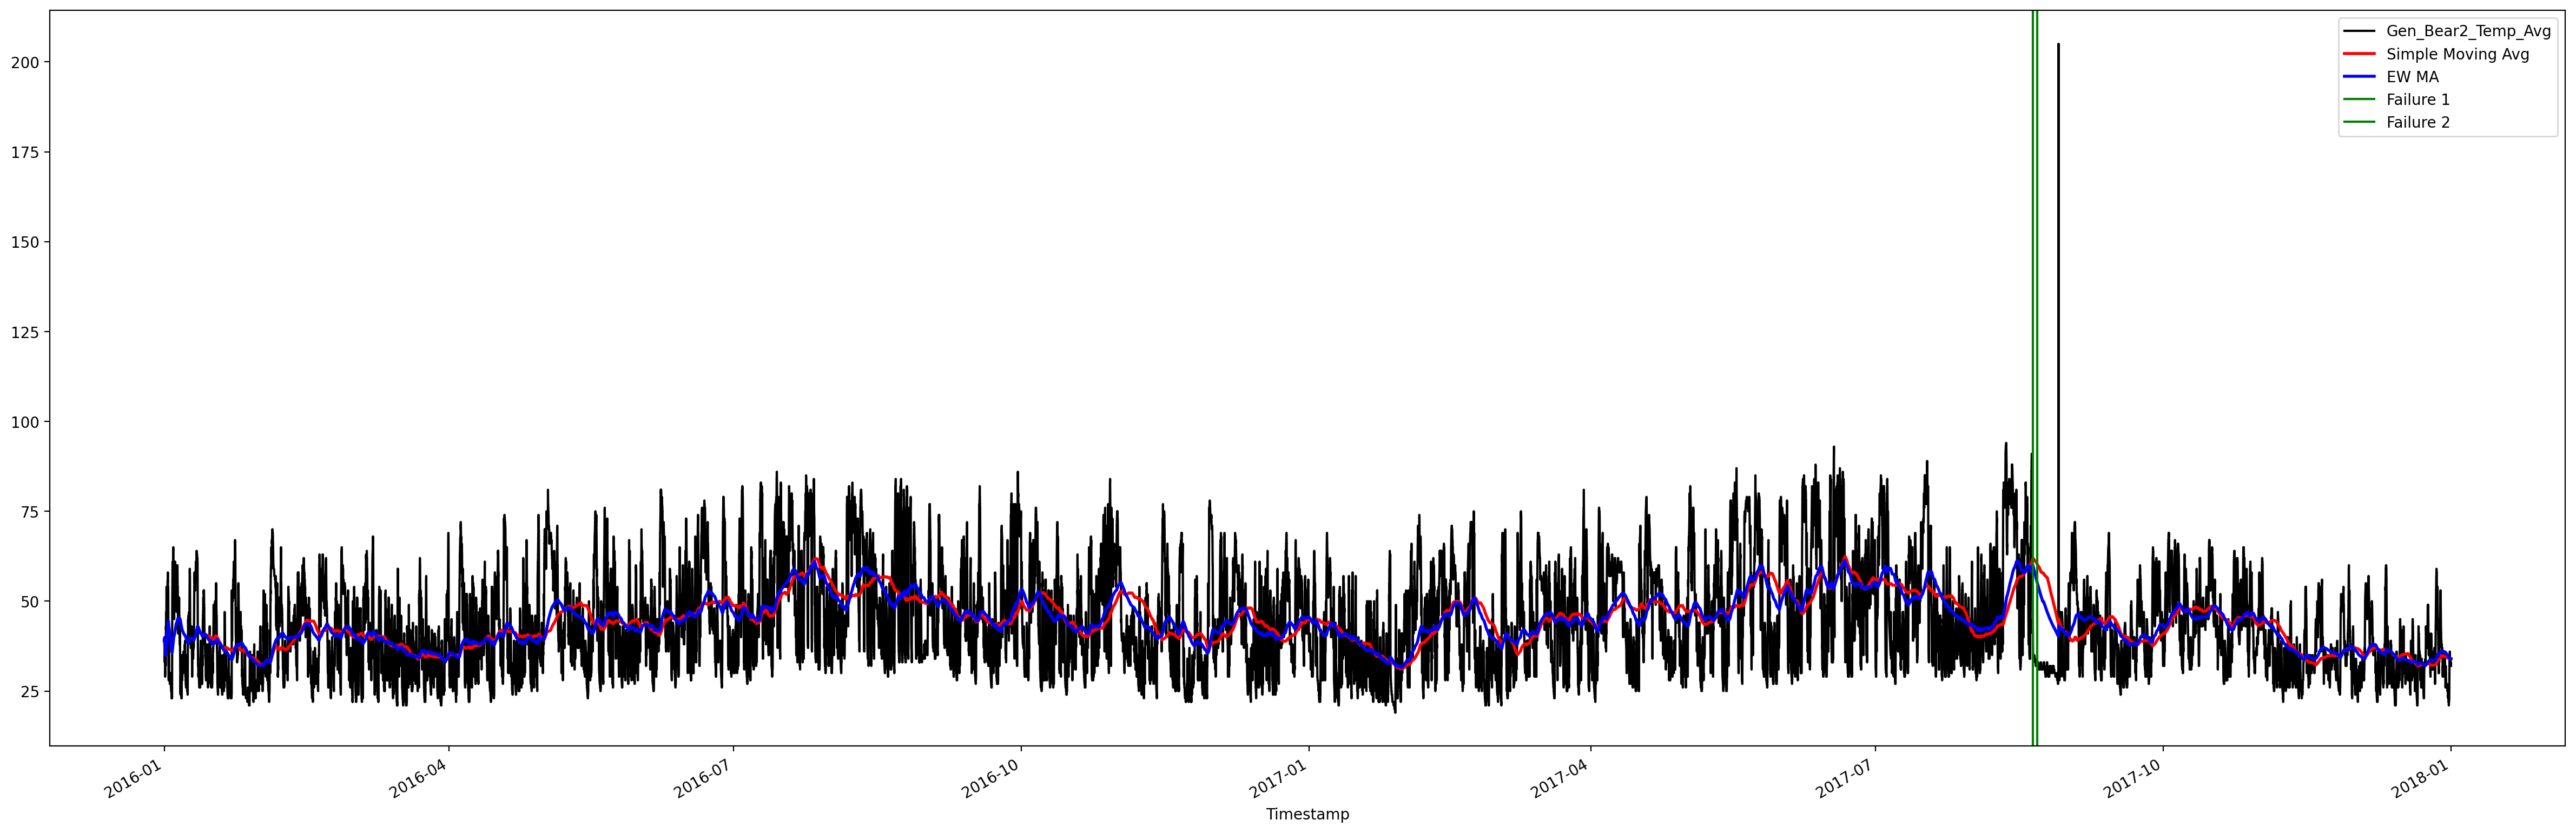

In [133]:
# Select time interval to plot
df_07_bear2 = df_07['Gen_Bear2_Temp_Avg'][:]

# Insert timestamp of failure registered
time_of_failure = ['2017-08-20 08:10:00', '2017-08-21 16:50:00']

# Create moving average
ma = df_07_bear2.rolling(2000).mean()

# Create exponentially weighted moving average
ewma = df_07_bear2.ewm(span=2000).mean()

# Define size of plot and styles etc.
plt.figure(figsize=(30, 10), dpi=200)
df_07_bear2.plot(style="k", label="Gen_Bear2_Temp_Avg")
ma.plot(style="r", label="Simple Moving Avg", linewidth=2.0)
ewma.plot(style="b", label="EW MA", linewidth=2.0)

# Create vertical lines at times of failure
n = 1
for failure in time_of_failure:
    plt.axvline(x=failure, color='g', label='Failure ' + str(n))
    n += 1

plt.legend()
plt.show()

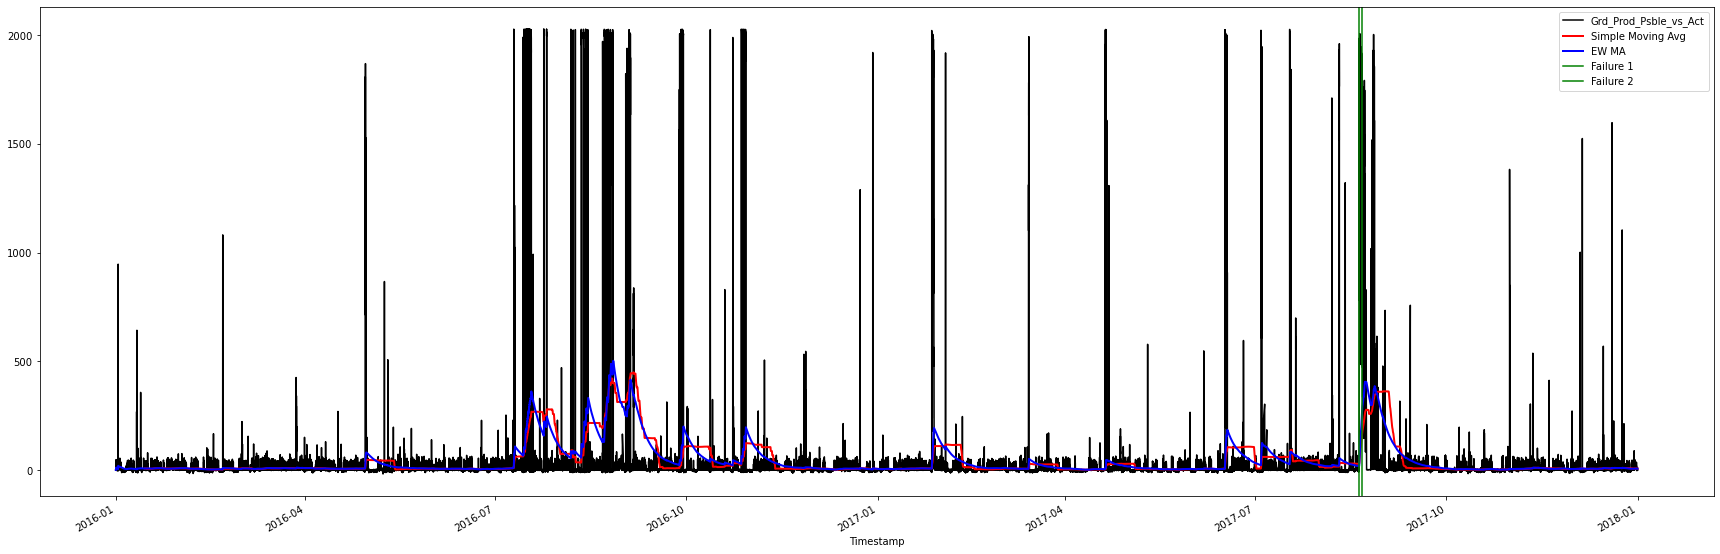

In [135]:
# Select time interval to plot
df_07_Psble_vs_Act = df_07['Grd_Prod_Psble_vs_Act'][:]

# Insert timestamp of failure registered
time_of_failure = ['2017-08-20 08:10:00', '2017-08-21 16:50:00']

# Create moving average
ma = df_07_Psble_vs_Act.rolling(2000).mean()

# Create exponentially weighted moving average
ewma = df_07_Psble_vs_Act.ewm(span=2000).mean()

# Define size of plot and styles etc.
plt.figure(figsize=(30, 10))
df_07_Psble_vs_Act.plot(style="k", label="Grd_Prod_Psble_vs_Act")
ma.plot(style="r", label="Simple Moving Avg", linewidth=2.0)
ewma.plot(style="b", label="EW MA", linewidth=2.0)

# Create vertical lines at times of failure
n = 1
for failure in time_of_failure:
    plt.axvline(x=failure, color='g', label='Failure ' + str(n))
    n += 1

plt.legend()
plt.show()